### POC: "USB Mouse Jiggler"
- euskalhack-night-meeting-donostia-25-oct 2024
- 

<pre>
En esta POC flasearemos y programaremos un Dispositivo Circuitpython
Para que se presente como un dispositivo USB HID personalizado**

** Personalizaremos VID , PID y alguna cadena de config 
</pre>
___

<pre>
CC Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)   
https://creativecommons.org/licenses/by-sa/4.0/   
https://euskalhack.org/   
</pre>
___
<br>


Un "USB Mouse Jiggler" es un dispositivo que simula la actividad del usuario en una computadora al mover el cursor del ratón, evitando que el sistema entre en modo de suspensión o active un cierre de sesión automático. 

___

## - 1) Flassear firmware 

___

## - 2) Cargar Libreria adafruit_hid 

___

## - 3) Cargar boot.py

```python
## Contenido boot.py (archivo de configuracion se ejecuta nada mas arrancar la maq)
## Aqui se definen los parametros USB (se ejecuta antes del usb)


import usb_cdc, usb_hid, storage, supervisor

storage.disable_usb_drive() #desabilito storaje para liberar endpoints
#Haces el dispositivo mas dificil de detectar


#Configuro parametros USB:         Fabricante    , Producto          , VID  , PID
supervisor.set_usb_identification("euskalhack-night-meeting2024","Hack_USB_Python",0x2E8A,0x0005)


#Ojo si desabilitas el CDC y el usb_drive pierdes el control
#Pero haces el dispositivo mas dificil de detectar
#usb_cdc.enable(console=False, data=True)    # desabilita cdc

#Habilito Raton (para que haga de jiggler)
#usb_hid.enable((usb_hid.Device.MOUSE,))
usb_hid.enable((usb_hid.Device.KEYBOARD,usb_hid.Device.MOUSE))


print("fin boot.py")
```


___

### - Esto es lo que aparecera al reiniciar el dispositivo
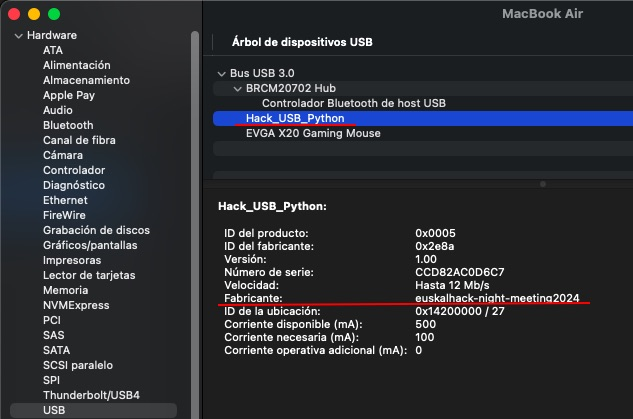


## - 4) Cargar code.py

```python
## Contenido code.py (archivo con el codigo usb-jiggler
import time
import usb_hid
from adafruit_hid.mouse import Mouse

mouse = Mouse(usb_hid.devices)

# bucle infinito para que se procese indefinidamente
# nota lo limito a 300seg para depuracion/pruebas
tiempo_inicial = time.time()
while True and (time.time() - tiempo_inicial) < 300:
    mouse.move(x=2)
    time.sleep(0.1)
    #mouse.move(x=-2)
    time.sleep(5)

```


## - 5) steal / ocultar dispositivo

<pre>
La idea es que el dispositivo se parezca a un raton real

Para ello. No deberia anunciarse como dispositivo compuesto ***

Tengo que desabilitar usb_drive y usb_cdc 
dejando solo usb_hid/mouse

</pre>

____

<pre>
Un "dispositivo compuesto", en el contexto de USB y hardware, se refiere a un dispositivo que tiene múltiples interfaces controladas de forma independiente entre sí. Esto significa que un único dispositivo físico puede ser reconocido por el sistema anfitrión como teniendo múltiples funciones
</pre>

## Nota: volver a habilitar el disco
```python
# reinicia en modo seguro Asi puedo reprogamar
import microcontroller
microcontroller.on_next_reset(microcontroller.RunMode.SAFE_MODE)
microcontroller.reset()
```